# Exploratory Data Analysis of E-commerce Dataset

In [1]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load CSVs
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display data overview
print(customers.info())
print("\n")
print(products.info())
print("\n")
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ----------



* It can be observed that none of the 3 csv's have null values
* Data types for each column are appropriate for time series analysis, and customer segmentation.


### Time Series of Transaction happening on E-Commerce platform

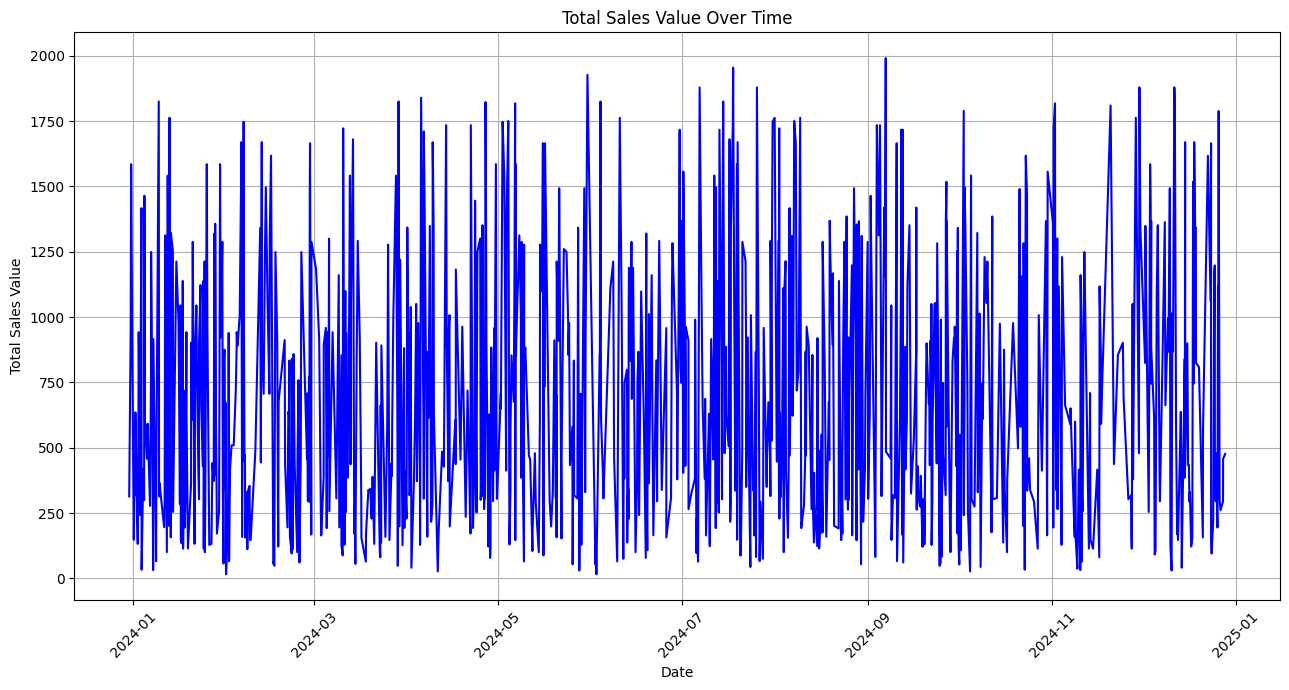

In [44]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
daily_sales = transactions.groupby('TransactionDate')['TotalValue'].sum()

plt.figure(figsize=(13, 7))
plt.plot(daily_sales.index, daily_sales.values, color='blue')
plt.title('Total Sales Value Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Extracting Business Insights

<ipython-input-40-0017cfc7d9b0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_count.index, y=region_count.values, palette="viridis")
<ipython-input-40-0017cfc7d9b0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_signups.index, y=region_signups.values, palette="coolwarm")


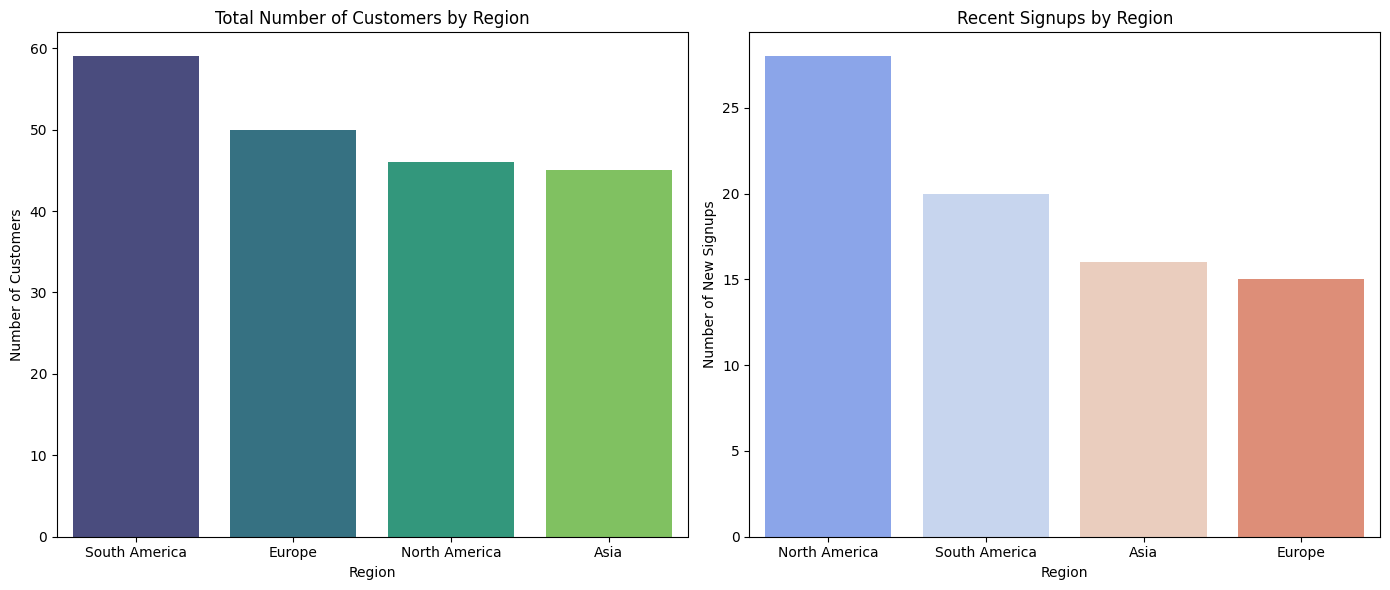

In [40]:
# Insight 1: Customers by Region
region_count = customers['Region'].value_counts()
plt.figure(figsize=(14, 6))

# First subplot: Total Number of Customers by Region
plt.subplot(1, 2, 1)
sns.barplot(x=region_count.index, y=region_count.values, palette="viridis")
plt.title("Total Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
recent_signups = customers[customers['SignupDate'] > '2024-01-01']
region_signups = recent_signups['Region'].value_counts()

# Second subplot: Recent Signups by Region
plt.subplot(1, 2, 2)
sns.barplot(x=region_signups.index, y=region_signups.values, palette="coolwarm")
plt.title("Recent Signups by Region")
plt.xlabel("Region")
plt.ylabel("Number of New Signups")
plt.tight_layout()
plt.show()

* It can be observed that the platform is quite famous in the South American continent compared to other continents when total active customers are compared.

* It is confirmed from this plot that it is becoming more and more popular with North American customers as highest number of people have signed up in the past 1 year.

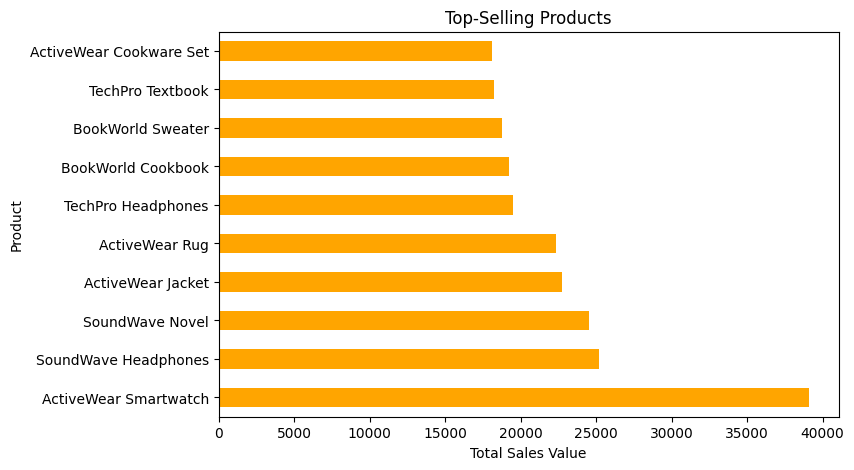

In [32]:
# Insight 2: Top-Selling Products by Sales
transactions = transactions.merge(products, on='ProductID', suffixes=('', '_product'))
product_sales = transactions.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
product_sales.plot(kind='barh', color='orange')
plt.title("Top-Selling Products")
plt.xlabel("Total Sales Value")
plt.ylabel("Product")
plt.show()

* It can be observed that "ActiveWear SmartWatch" is the most popular item among customers on the platform.

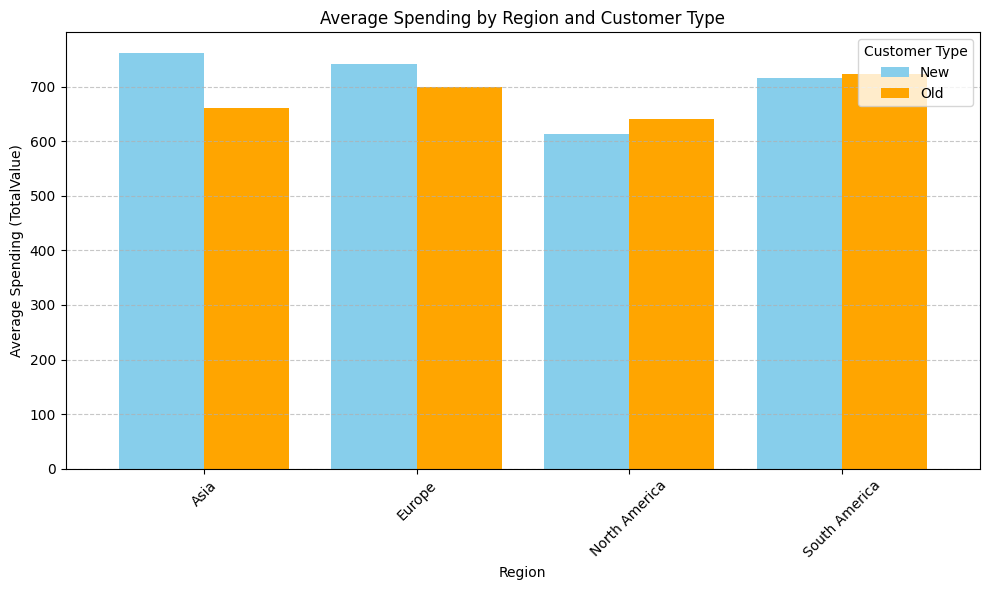

In [28]:
# Insight 3: Trend of shopping by recent Signup and old customers
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['CustomerType'] = customers['SignupDate'].apply(lambda x: 'Old' if x < pd.Timestamp('2024-01-01') else 'New')

merged_data = transactions.merge(customers, on='CustomerID')
# print(merged_data.columns)
region_spending = (
    merged_data.groupby(['Region_x', 'CustomerType'])['TotalValue']
    .mean()
    .reset_index()
    .rename(columns={'TotalValue': 'AvgSpending'})
)

pivot_data = region_spending.pivot(index='Region_x', columns='CustomerType', values='AvgSpending').fillna(0)

pivot_data.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'], width=0.8)
plt.title("Average Spending by Region and Customer Type")
plt.xlabel("Region")
plt.ylabel("Average Spending (TotalValue)")
plt.xticks(rotation=45)
plt.legend(title="Customer Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* It can be observed that new customers in Asia and Europe tend to spend more on an average compared to old customers.

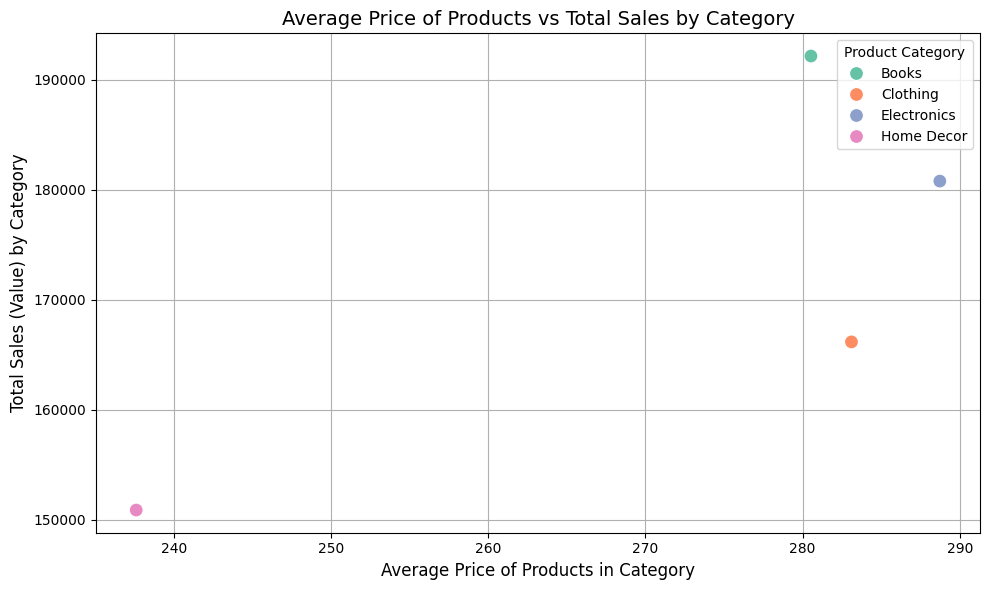

In [35]:
# Insight 4: Relation between product price by category and its total sales
transactions = transactions.merge(products, on='ProductID', suffixes=('', '_product'))

category_sales = transactions.groupby('Category').agg({
    'Price': 'mean',
    'TotalValue': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=category_sales, x='Price', y='TotalValue', hue='Category', palette='Set2', s=100)

plt.title('Average Price of Products vs Total Sales by Category', fontsize=14)
plt.xlabel('Average Price of Products in Category', fontsize=12)
plt.ylabel('Total Sales (Value) by Category', fontsize=12)
plt.legend(title='Product Category', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

* It is observed that "Home Decor" products are priced less on an average and people have bought them the least among other category products, it may be because people are not satisfied with quality of these products.

* On the other hand "Books" are prices on a higher side and it is most popular category of items people like to shop for.

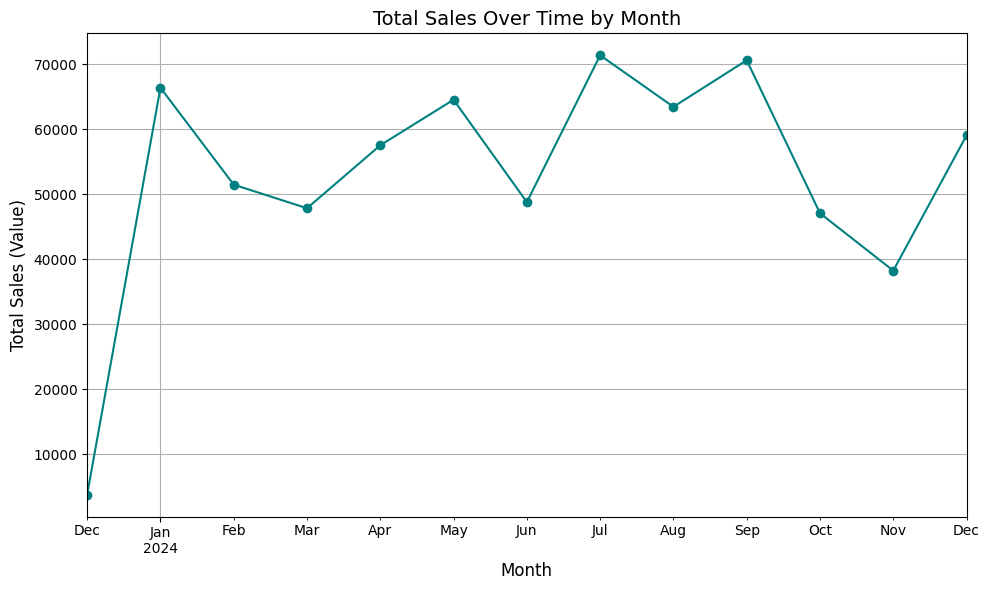

In [47]:
# Insight 5: Time duration of the year during which most amount of purchases have been made
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')

monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='teal')

plt.title('Total Sales Over Time by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (Value)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

It can be observed that people buy the most during January in the New Year period and during July-September during Fall period.